In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O6','C6']
psi_dihedral=['C1','O6','C6','C5']

di_sugar=['FUC', 'NAG']
di_sugar2= ['LFucpa', 'DGlcpNAcb']
link= '1-6'
patterns1= [di_sugar[0]+'(*_*_)]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-'+di_sugar[1]+'(*_*_)',di_sugar[0]+'(*_*_)]-[*]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-[*]-'+di_sugar[1]+'(*_*_)']
patterns2= [di_sugar2[0]+link+di_sugar2[1], di_sugar2[0]+link+']'+di_sugar2[1], di_sugar2[0]+link+'[*]'+di_sugar2[1]]
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-6D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A7C', '1ABR', '1ABR', '1AGM', '1AH1', '1AU1', '1AU1', '1AX0', '1AX1', '1AX2', '1AXY', '1AXZ', '1B0F', '1B0F', '1B37', '1B41', '1B5F', '1B5Q', '1BHG', '1BHG', '1BLF', '1BRR', '1BRR', '1BZB', '1C1Z', '1CDR', '1CF5', '1CF5', '1CKL', '1CKL', '1CKL', '1CKL', '1CPO', '1CVI', '1CVI', '1CVI', '1CVI', '1CVN', '1CVN', '1CVN', '1CVN', '1CVU', '1CVU', '1CXP', '1CXP', '1D2V', '1D2V', '1D5L', '1D5L', '1D7W', '1D7W', '1DEO', '1DEX', '1DGL', '1DGL', '1DIY', '1DL2', '1DN2', '1DN2', '1DNU', '1DNU', '1DNW', '1DNW', '1DOG', '1DP5', '1DPJ', '1DWA', '1DWF', '1DWG', '1DWH', '1DWI', '1DWJ', '1DZE', '1E04', '1E05', '1E4K', '1E4K', '1E6Q', '1E6S', '1EOM', '1ETH', '1ETH', '1EX1', '1F6A', '1F6A', '1F6A', '1F6A', '1F8B', '1F8C', '1F8D', '1F8E', '1F8R', '1F8R', '1F8R', '1FC1', '1FC1', '1FC2', '1FE2', '1FE8', '1FE8', '1FE8', '1FI1', '1FRT', '1FRT', '1FUJ', '1FUJ', '1FUJ', '1FUJ', '1FX5', '1FZD', '1FZD', '1FZD', '1FZD', '1G0V', '1G6I', '1G6I

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 25 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 25 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 2486 
valid torsion1 and torsion2: (2486, 2486)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['3.P', '1.P'], ['1C4', '4C1'])
(['3.B', '1.B'], ['1C4', '4C1'])
(['4.C', '1.C'], ['4C1', '4C1'])
(['8.D', '1.D'], ['1C4', '4C1'])
(['8.C', '1.C'], ['1C4', '4C1'])
(['4.F', '1.F'], ['1C4', '4C1'])
(['4.E', '1.E'], ['1C4', '-'])
(['6.C', '1.C'], ['1C4', '4C1'])
(['8.D', '1.D'], ['-', '4C1'])
(['7.C', '1.C'], ['1C4', '4C1'])
(['7.M', '1.M'], ['1C4', '4C1'])
(['4.I', '1.I'], ['-', '4C1'])
(['3.B', '1.B'], ['1C4', '4C1'])
(['6.E', '1.E'], ['1C4', '4C1'])
(['4.D', '1.D'], ['1C4', '4C1'])
(['4.F', '1.F'], ['1C4', '4C1'])
(['5.C', '1.C'], ['1C4', '4C1'])
(['4.F', '1.F'], ['1C4', '4C1'])
(['2.G', '1.G'], ['1C4', '4C1'])
(['4.G', '1.G'], ['1C4', '4C1'])
(['3.E', '1.E'], ['1C4', '4C1'])
(['3.E', '1.E'], ['1C4', '4C1'])
(['3.D', '1.D'], ['1C4', '-'])
(['2.C', '1.C'], ['1C4', '4C1'])
(['2.H', '1.H'], ['1C4', '4C1'])
(['3.C', '1.C'], ['-', '4C1'])
(['3.D', '1.D'], ['1C4', '-'])
(['6.D', '1.D'], ['1C4', '4C1'])
(['2.O', '1.O'], ['1C4', '-'])
(['2.Q', '1.Q'], ['1C4', '-'])
(['2.M', '1.M'], ['1C4', '

In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//7ndb.pdb P FUC 3 C1
../../pdbs//7ndb.pdb P NAG 1 O6
26802 26786
Connection found between(2) 26802 and 26786
../../pdbs//3bkk.pdb B FUC 3 C1
../../pdbs//3bkk.pdb B NAG 1 O6
4876 4860
Connection found between 4876 and 4860
../../pdbs//7uac.pdb C FUC 4 C1
../../pdbs//7uac.pdb C NAG 1 O6
4501 4474
Connection found between 4501 and 4474
../../pdbs//3d6g.pdb D FUC 8 C1
../../pdbs//3d6g.pdb D NAG 1 O6
3575 3498
Connection found between 3575 and 3498
../../pdbs//3d6g.pdb C FUC 8 C1
../../pdbs//3d6g.pdb C NAG 1 O6
3476 3399
Connection found between 3476 and 3399
../../pdbs//7ni3.pdb F FUC 4 C1
../../pdbs//7ni3.pdb F NAG 1 O6
9207 9180
Connection found between 9207 and 9180
../../pdbs//7ni3.pdb E FUC 4 C1
../../pdbs//7ni3.pdb E NAG 1 O6
9158 9131
Connection found between 9158 and 9131
../../pdbs//6c6c.pdb C FUC 6 C1
../../pdbs//6c6c.pdb C NAG 1 O6
3008 2959
Connection found between 3008 and 2959
../../pdbs//5jii.pdb D FUC 8 C1
../../pdbs//5jii.pdb D NAG 1 O6
6837 6696
Connection foun

In [13]:
outfile_name = di_sugar2[0]+link+di_sugar2[1]

In [14]:
output_df.to_csv(outfile_name+'_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv(outfile_name+'_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [15]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [16]:
output_df

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,7ndb.pdb,P FUC 3 C2 C1 NAG 1 O6 C6,P FUC 3 C1 NAG 1 O6 C6 C5,121.5020,157.7060,"([FUC(3_P_), NAG(1_P_)], [480.25, 466.72])",FUC(3_P_)-[NAG(2_P_)]-NAG(1_P_)-ASN(102_H_),DGlcpNAcb1-4[LFucpa1-6]DGlcpNAcb1-ASN,"([3.P, 1.P], [1C4, 4C1])"
1,3bkk.pdb,B FUC 3 C2 C1 NAG 1 O6 C6,B FUC 3 C1 NAG 1 O6 C6 C5,159.2230,192.5890,"([FUC(3_B_), NAG(1_B_)], [43.4, 40.35])",FUC(3_B_)-[NAG(2_B_)]-NAG(1_B_)-ASN(109_A_),DGlcpNAcb1-4[LFucpa1-6]DGlcpNAcb1-ASN,"([3.B, 1.B], [1C4, 4C1])"
2,7uac.pdb,C FUC 4 C2 C1 NAG 1 O6 C6,C FUC 4 C1 NAG 1 O6 C6 C5,81.4578,109.6750,"([FUC(4_C_), NAG(1_C_)], [101.15, 103.79])",FUC(4_C_)-[BMA(3_C_)-NAG(2_C_)]-NAG(1_C_)-ASN(...,DManpb1-4DGlcpNAcb1-4[LFucpa1-6]DGlcpNAcb1-ASN,"([4.C, 1.C], [4C1, 4C1])"
3,3d6g.pdb,D FUC 8 C2 C1 NAG 1 O6 C6,D FUC 8 C1 NAG 1 O6 C6 C5,163.0580,211.3890,"([FUC(8_D_), NAG(1_D_)], [70.63, 64.66])",FUC(8_D_)-[NAG(7_D_)-MAN(6_D_)-[NAG(5_D_)-MAN(...,DGlcpNAcb1-2DManpa1-3[DGlcpNAcb1-2DManpa1-6]DM...,"([8.D, 1.D], [1C4, 4C1])"
4,3d6g.pdb,C FUC 8 C2 C1 NAG 1 O6 C6,C FUC 8 C1 NAG 1 O6 C6 C5,140.4990,145.4240,"([FUC(8_C_), NAG(1_C_)], [74.65, 70.12])",FUC(8_C_)-[NAG(7_C_)-MAN(6_C_)-[NAG(5_C_)-MAN(...,DGlcpNAcb1-2DManpa1-3[DGlcpNAcb1-2DManpa1-6]DM...,"([8.C, 1.C], [1C4, 4C1])"
...,...,...,...,...,...,...,...,...,...
2422,7r18.pdb,H FUC 3 C2 C1 NAG 1 O6 C6,H FUC 3 C1 NAG 1 O6 C6 C5,154.2800,149.0990,"([FUC(3_H_), NAG(1_H_)], [36.81, 30.11])",FUC(3_H_)-[NAG(2_H_)]-NAG(1_H_)-ASN(1098_B_),DGlcpNAcb1-4[LFucpa1-6]DGlcpNAcb1-ASN,"([3.H, 1.H], [1C4, 4C1])"
2423,7r18.pdb,K FUC 3 C2 C1 NAG 1 O6 C6,K FUC 3 C1 NAG 1 O6 C6 C5,154.3200,149.0770,"([FUC(3_K_), NAG(1_K_)], [36.81, 30.11])",FUC(3_K_)-[NAG(2_K_)]-NAG(1_K_)-ASN(1098_C_),DGlcpNAcb1-4[LFucpa1-6]DGlcpNAcb1-ASN,"([3.K, 1.K], [1C4, 4C1])"
2424,1jdn.pdb,C FUC 5 C2 C1 NAG 1 O6 C6,C FUC 5 C1 NAG 1 O6 C6 C5,178.2580,274.3079,"([FUC(5_C_), NAG(1_C_)], [90.42, 65.52])",FUC(5_C_)-[BMA(4_C_)-MAN(3_C_)-NAG(2_C_)]-NAG(...,DManpb1-4DManpa1-4DGlcpNAcb1-4[LFucpa1-6]DGlcp...,"([5.C, 1.C], [5H4, -])"
2425,3sdy.pdb,G FUC 4 C2 C1 NAG 1 O6 C6,G FUC 4 C1 NAG 1 O6 C6 C5,105.4650,210.8010,"([FUC(4_G_), NAG(1_G_)], [65.63, 119.57])",FUC(4_G_)-[BMA(3_G_)-NAG(2_G_)]-NAG(1_G_)-ASN(...,DManpb1-4DGlcpNAcb1-4[LFucpa1-6]DGlcpNAcb1-ASN,"([4.G, 1.G], [-, -])"


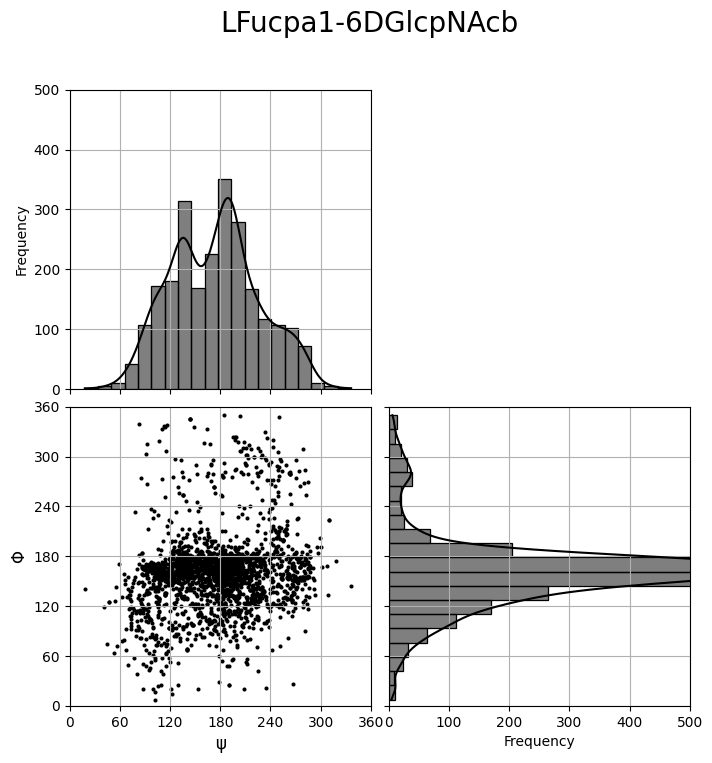

In [18]:
instant1.plot(torsions=output_df, title=outfile_name,max_histogram_scale=500,step_histogram_tick=100)